In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictionused-cars/car data.csv


In [2]:
data=pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
print("Duplicate Entry in data",len(data[data.duplicated()]))

Duplicate Entry in data 2


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.dropna(inplace=True)

In [6]:
data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data1=data.drop(['Owner','Selling_type','Transmission'],axis=1)

In [9]:
data1

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type
0,ritz,2014,3.35,5.59,27000,Petrol
1,sx4,2013,4.75,9.54,43000,Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol
4,swift,2014,4.60,6.87,42450,Diesel
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel
297,brio,2015,4.00,5.90,60000,Petrol
298,city,2009,3.35,11.00,87934,Petrol
299,city,2017,11.50,12.50,9000,Diesel


In [10]:
data1.Fuel_Type=[1 if each == "Diesel" else 0 for each in data.Fuel_Type]

In [11]:
data1

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type
0,ritz,2014,3.35,5.59,27000,0
1,sx4,2013,4.75,9.54,43000,1
2,ciaz,2017,7.25,9.85,6900,0
3,wagon r,2011,2.85,4.15,5200,0
4,swift,2014,4.60,6.87,42450,1
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1
297,brio,2015,4.00,5.90,60000,0
298,city,2009,3.35,11.00,87934,0
299,city,2017,11.50,12.50,9000,1


In [12]:
data.shape

(299, 9)

In [13]:
categorical_features=[col for col in data1.columns if data1[col].dtype=='O']
categorical_features

['Car_Name']

In [14]:
data1=categorical_features

In [15]:
data2=data.apply(LabelEncoder().fit_transform)
data2

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,11,59,58,86,2,0,1,0
1,93,10,78,105,135,1,0,1,0
2,68,14,112,107,26,2,0,1,0
3,96,8,52,49,18,2,0,1,0
4,92,11,76,74,134,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,13,129,116,103,1,0,1,0
297,66,12,70,63,172,2,0,1,0
298,69,6,59,115,193,2,0,1,0
299,69,14,137,121,31,1,0,1,0


In [16]:
x=data2.drop(['Car_Name'],axis=1)
y=data2.Car_Name

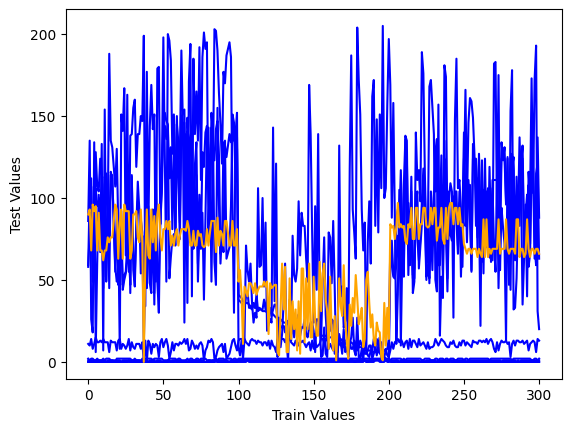

In [17]:
plt.plot(x,color='blue',label='train')
plt.plot(y,color='orange',label='test')
plt.xlabel('Train Values')
plt.ylabel('Test Values')
plt.show()

<Axes: >

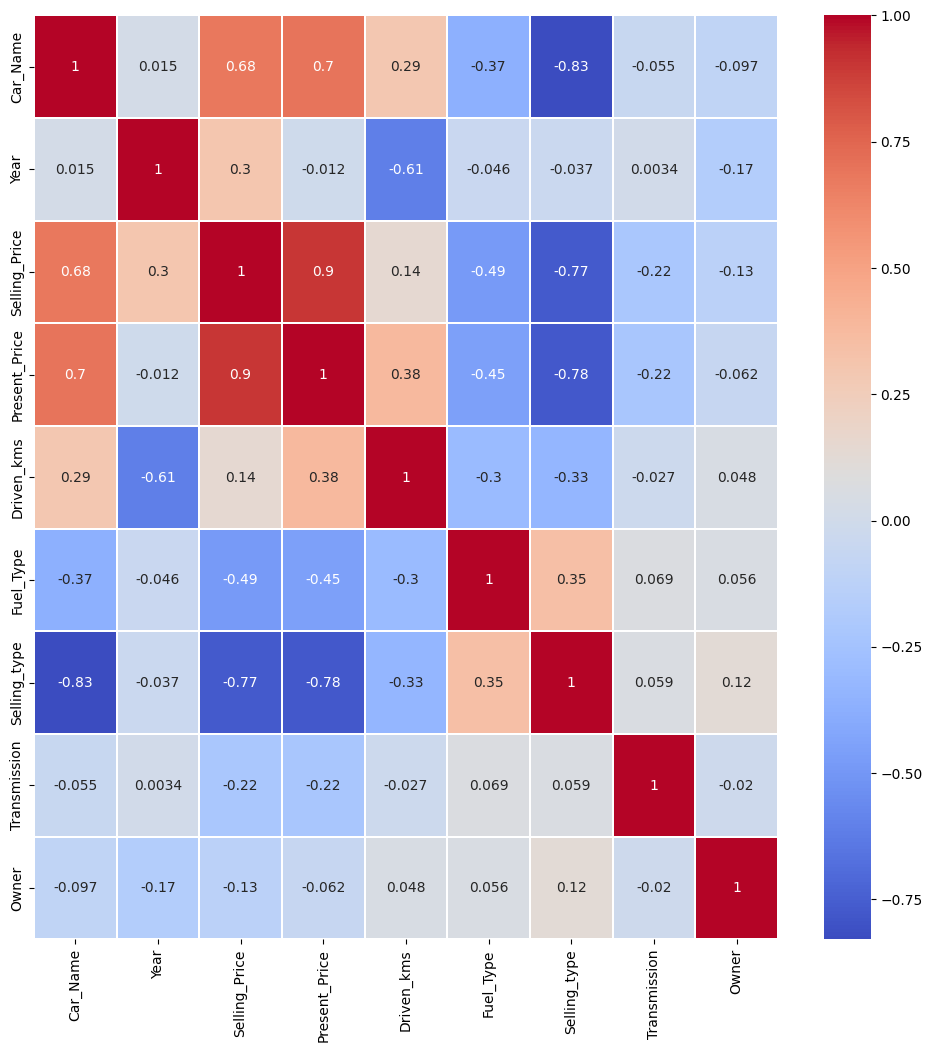

In [18]:
# .corr() used to find co relation with data

data_corr=data2.corr()
plt.figure(figsize=(12,12))

# cmap use for color palette,linewidths: set the widthof the lines
# annot

sns.heatmap(data_corr,cmap='coolwarm',linewidths=0.1,annot=True,linecolor='white')

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)

In [20]:
def predict(ml_model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
    rob=RobustScaler()
    x_train=rob.fit_transform(x_train)
    x_test=rob.fit_transform(x_test)
    model=ml_model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(model.score(x_test,y_test),mean_squared_error(y_test,y_pred,squared=False))

0.6731932589598166 13.65076178711124


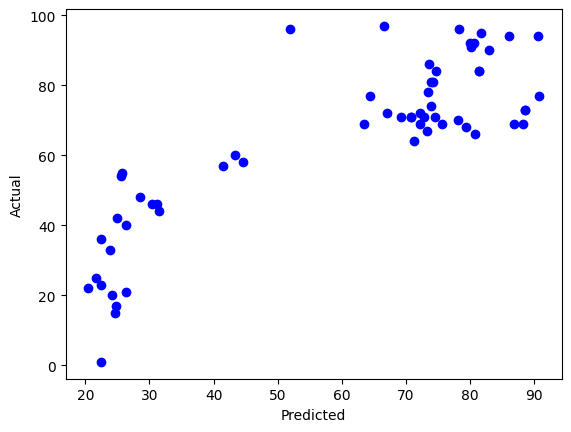

In [21]:
predict(LGBMRegressor(),x,y)

0.5680126506613974 15.694478859352632


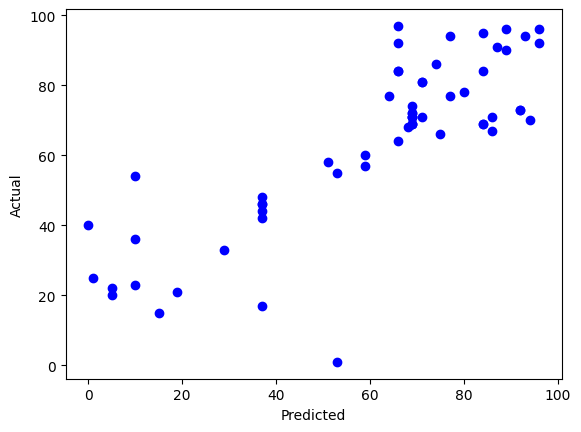

In [22]:
predict(DecisionTreeRegressor(),x,y)

0.7313009281925893 12.377828700274268


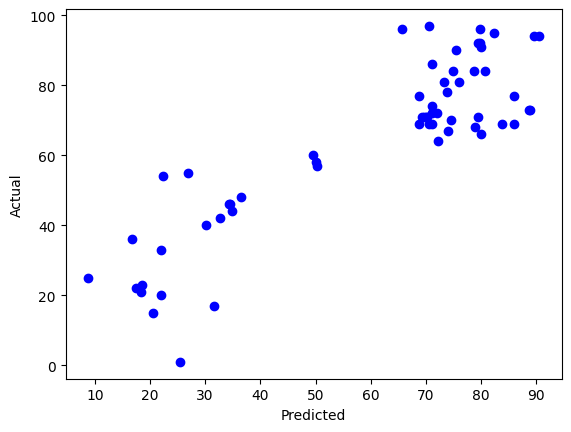

In [23]:
predict(RandomForestRegressor(),x,y)

0.6253989503575534 14.614901071623214


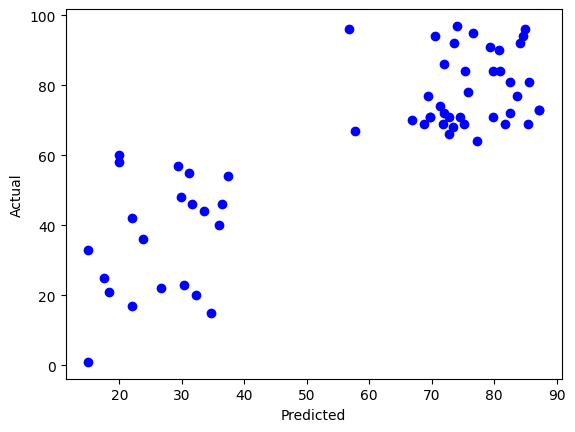

In [24]:
predict(KNeighborsRegressor(),x,y)

0.7095560635046833 12.868933068958489


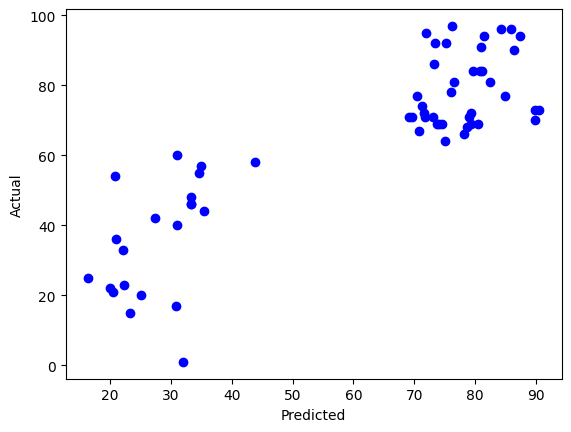

In [25]:
predict(ExtraTreesRegressor(),x,y)

0.6660589384573433 13.798958123789532


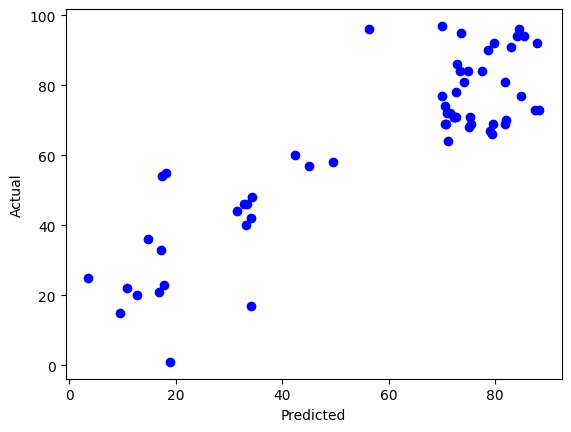

In [26]:
predict(GradientBoostingRegressor(),x,y)

0.5742668410096952 15.5804545444876


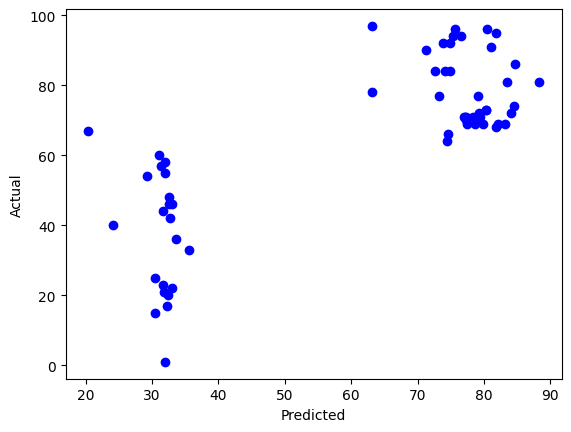

In [27]:
predict(Ridge(),x,y)

0.6649204161852288 13.822460853996908


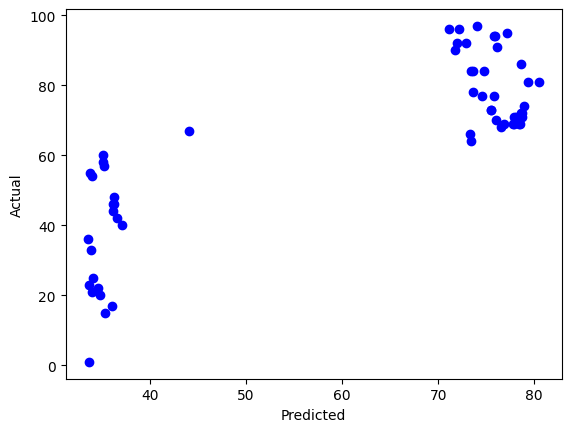

In [28]:
predict(Lasso(),x,y)

0.1 17.798876369029593


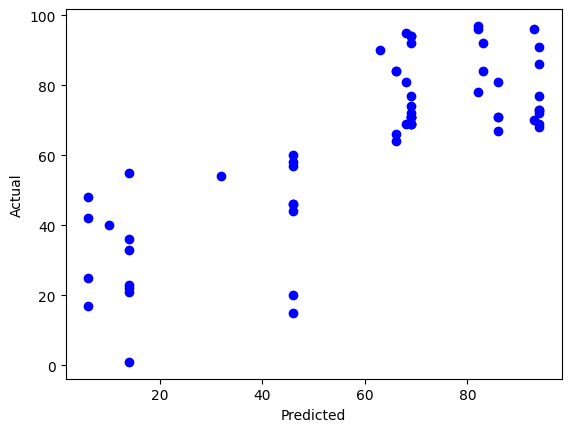

In [29]:
predict(LogisticRegression(),x,y)

0.556533471997639 15.901635996930196


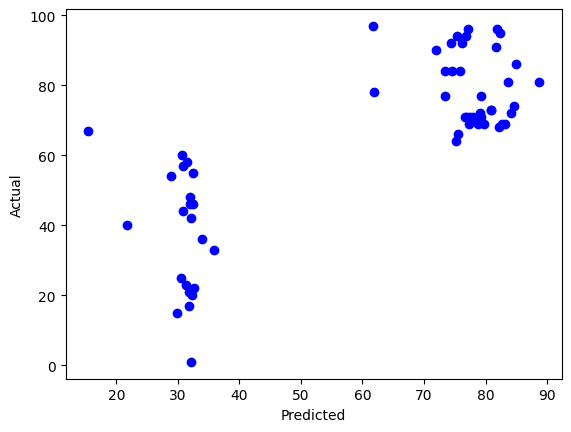

In [30]:
predict(LinearRegression(),x,y)

In [31]:
def predict_mm(ml_model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
    mm=MinMaxScaler()
    x_train=mm.fit_transform(x_train)
    x_test=mm.fit_transform(x_test)
    model=ml_model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(model.score(x_test,y_test),mean_squared_error(y_test,y_pred,squared=False))
    

0.7062344785183585 12.942309945161385


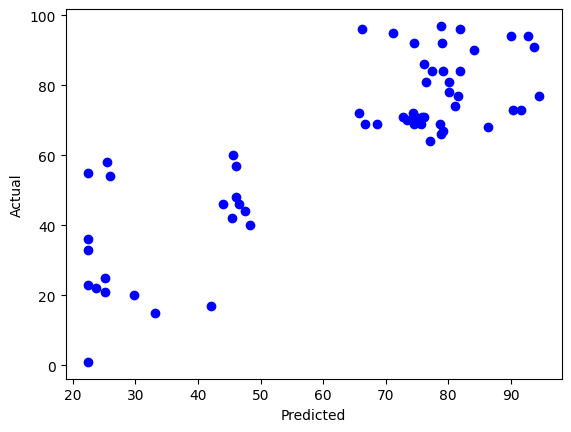

In [32]:
predict_mm(LGBMRegressor(),x,y)

0.514843627828532 16.632297896963404


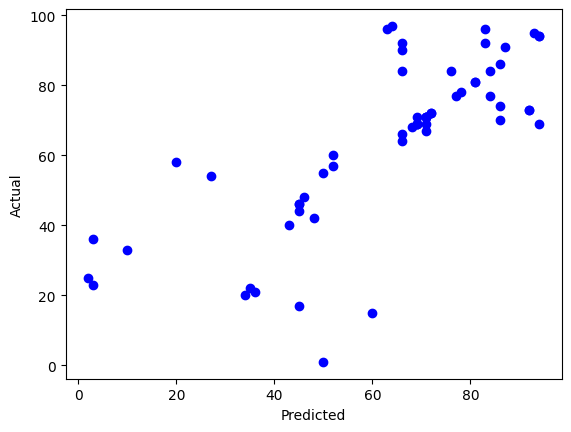

In [33]:
predict_mm(DecisionTreeRegressor(),x,y)

0.6746921004979298 13.619422405765476


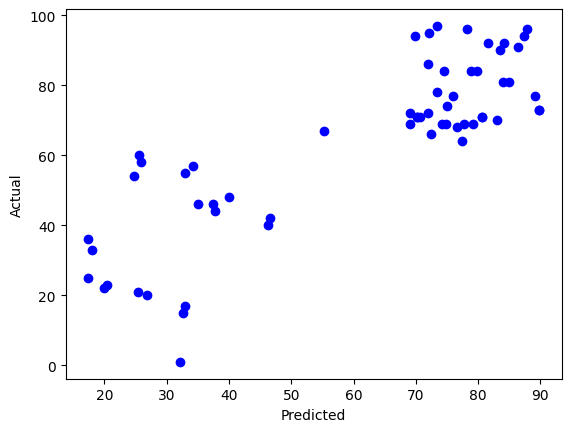

In [34]:
predict_mm(KNeighborsRegressor(),x,y)

0.6801431792971108 13.5048322215914


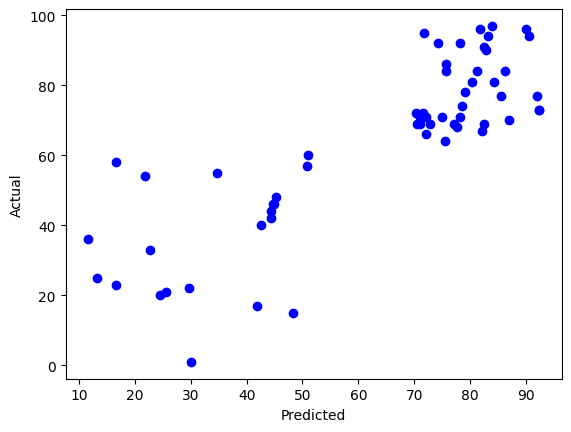

In [35]:
predict_mm(ExtraTreesRegressor(),x,y)

0.6324092136722088 14.4775040005009


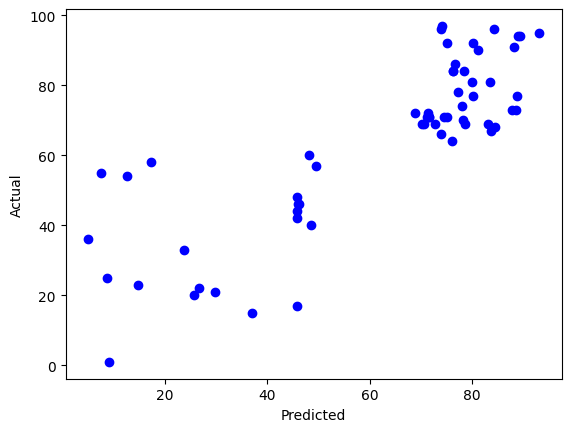

In [36]:
predict_mm(GradientBoostingRegressor(),x,y)

0.6322494391926073 14.480650004774322


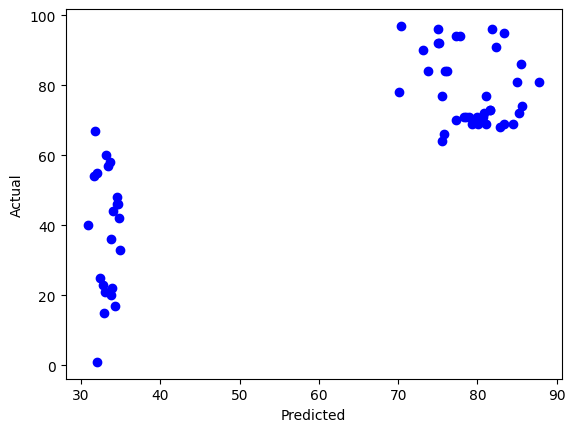

In [37]:
predict_mm(Ridge(),x,y)

0.6830768606075874 13.442757357151118


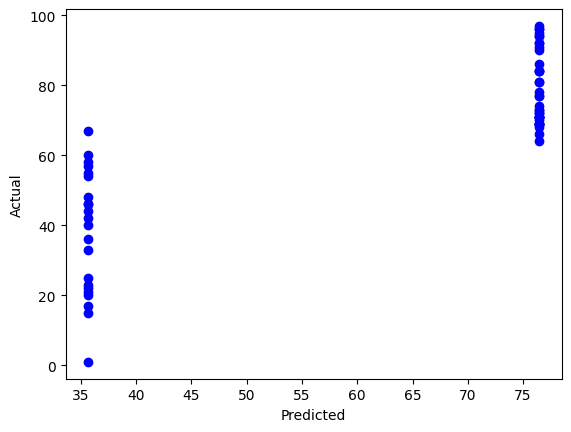

In [38]:
predict_mm(Lasso(),x,y)

0.13333333333333333 14.408909280950681


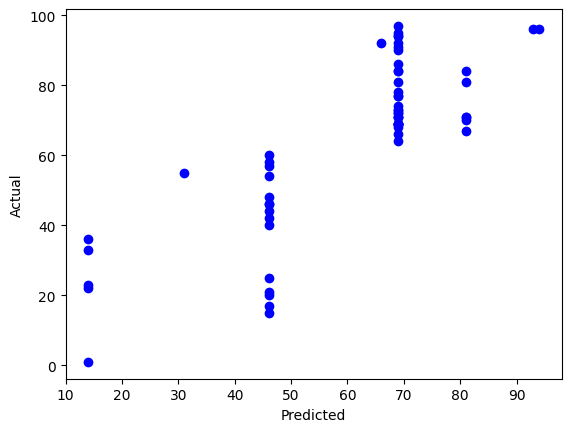

In [39]:
predict_mm(LogisticRegression(),x,y)

0.6224218403326796 14.672861483127324


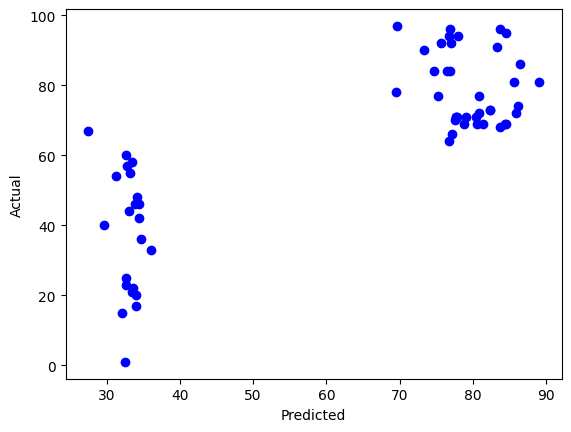

In [40]:
predict_mm(LinearRegression(),x,y)

In [41]:
def predict_ss(ml_model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
    ss=StandardScaler()
    x_train=ss.fit_transform(x_train)
    x_test=ss.fit_transform(x_test)
    model=ml_model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(model.score(x_test,y_test),mean_squared_error(y_test,y_pred,squared=False))
    

0.7771616484607908 11.272139466723834


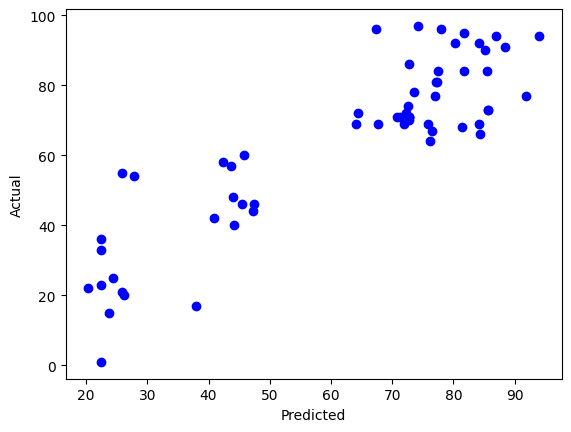

In [42]:
predict_ss(LGBMRegressor(),x,y)

0.674555304991136 13.622285662350011


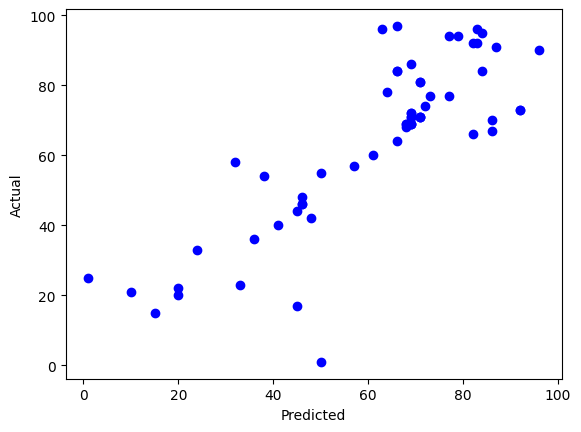

In [43]:
predict_ss(DecisionTreeRegressor(),x,y)

0.6532876958579898 14.060346131348735


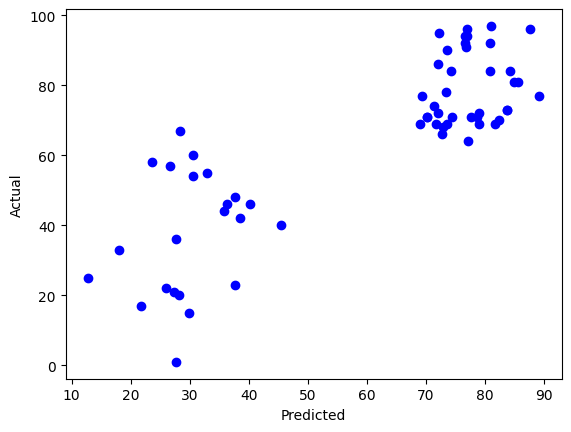

In [44]:
predict_ss(KNeighborsRegressor(),x,y)

0.7865963787189452 11.030933777337257


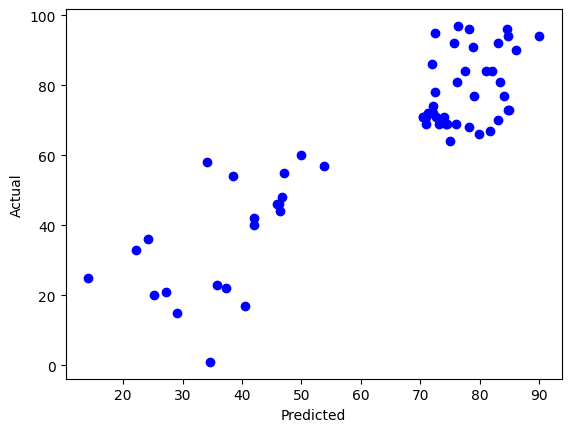

In [45]:
predict_ss(ExtraTreesRegressor(),x,y)

0.7824798769060484 11.136817558027358


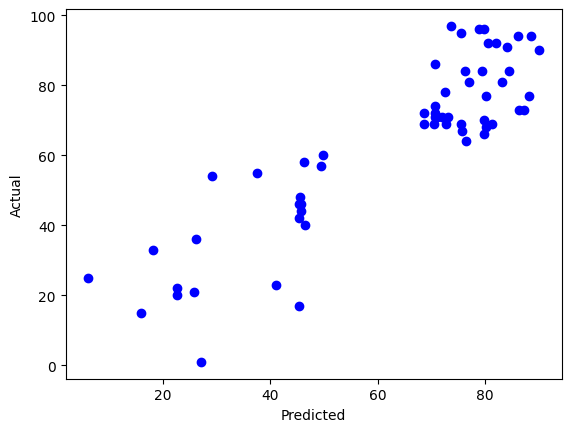

In [46]:
predict_ss(GradientBoostingRegressor(),x,y)

0.6266754860576578 14.589978071388325


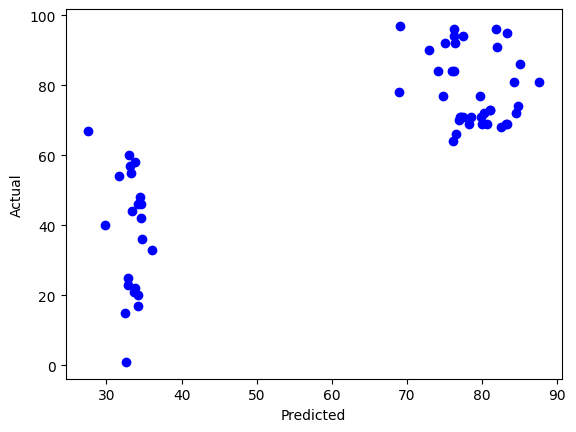

In [47]:
predict_ss(Ridge(),x,y)

0.6649244397666874 13.822377864810388


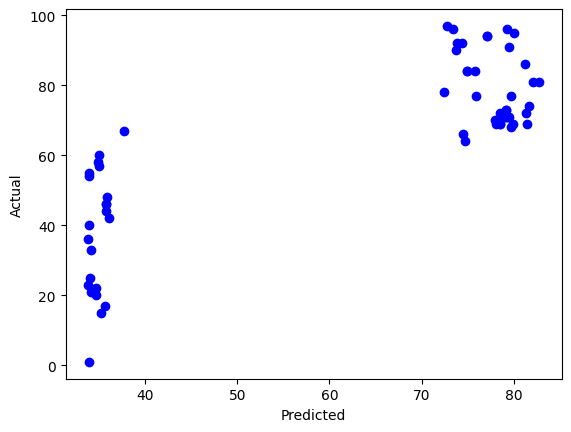

In [48]:
predict_ss(Lasso(),x,y)

0.11666666666666667 18.247830921326877


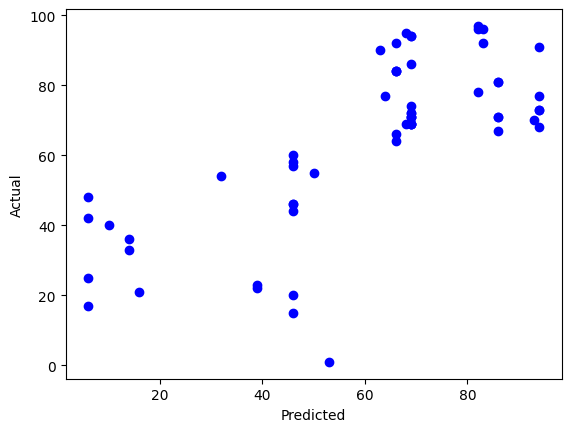

In [49]:
predict_ss(LogisticRegression(),x,y)

0.6259450591349299 14.604244084994878


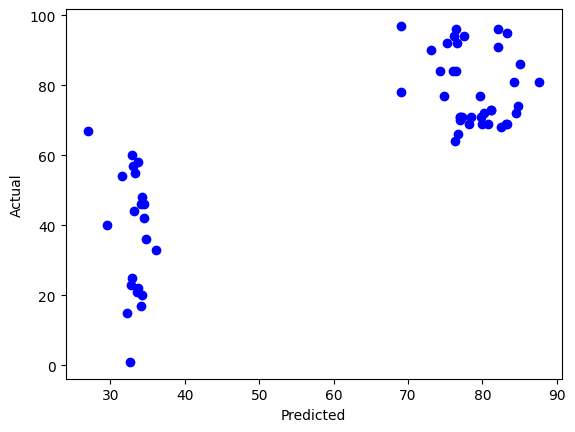

In [50]:
predict_ss(LinearRegression(),x,y)